### 问题二：

寻找建模主要变量：建立降低辛烷值损失模型涉及包括7个原料性质、2个待生吸附剂性质、2个再生吸附剂性质、2个产品性质等变量以及另外354个操作变量（共计367个变量），工程技术应用中经常使用先降维后建模的方法，这有利于忽略次要因素，发现并分析影响模型的主要变量与因素。因此，请你们根据提供的325个样本数据（见附件一），通过降维的方法从367个操作变量中筛选出建模主要变量，使之尽可能具有代表性、独立性（为了工程应用方便，建议降维后的主要变量在30个以下），并请详细说明建模主要变量的筛选过程及其合理性。（提示：请考虑将原料的辛烷值作为建模变量之一）。

> 认真查看《附件一：325个样本数据.xlsx》

考点：特征工程 ====> 特征选择&数据降维

前提假设：

+ 原料性质属于供应链中上游厂家生产，因为受到人为控制和国家法规约束，因此分布应当符合高斯分布
+ 原料性质的分散程度应该相对集中
+ 产品性质因为受到人为控制和国家法规约束，因此分布应当符合高斯分布

相应公式：

+ 缺失率(Missing Value Ratio) = $\frac{\displaystyle{\mathbb{I}}(v_{loss}^{(i)} = 0|d_{loss}^{(i)}  \in \displaystyle{\mathcal{D}}_{loss})}{\displaystyle{\mathbb{I}}(v_{loss}^{(i)} |d_{loss}^{(i)} \in \displaystyle{\mathcal{D}}_{loss})}$ 
+ 变异系数(Coefficient of Variation) =  $\frac{\displaystyle{\text{std}}(\displaystyle{\mathcal{V}_{r})}}{\displaystyle{\text{mean}}(\displaystyle{\mathcal{V}_{r}})}$
+ 相关系数(Correlation Coefficient) = 

可调参数：

+ $r_{2}$ => 缺失率(Missing Value Ratio)
+ $cv_{1}$ => 变异系数(Coefficient of Variation)
+ $cc_{1}$ => 相关系数(Correlation Coefficient)
+ $cc_{2}$ => 相关系数(Correlation Coefficient)

解题思路：

+ 《附件一：325个样本数据.xlsx》 = 7个原料性质 + 2个待生吸附剂性质 + 2个再生吸附剂性质 + 2个产品性质 + 降维(354个操作变量) => 2个产品性质(其中辛烷值RON损失值其实是由('产品性质','辛烷值RON含量')决定的)
+ 题意: 建模(7个原料性质, 2个待生吸附剂性质, 2个再生吸附剂性质, 2个产品性质, 降维(354个操作变量)) => 辛烷值RON损失值
    - 1、加入模型变量中需要包含 原料性质 中 辛烷值RON含量
    - 2、对 354个操作变量 进行降维操作，且不得 超过 (30 - 辛烷值RON含量 - 其他(原料性质或两组吸附剂性质))

> 在进行 特征选择 和 数据降维 之前需要 对 原料性质 进行高斯分布检验，依据 依达拉准则(3$\sigma$) 进行异常值排除，同时检测 原料属性 的 变异系数 ，利用最大最小限幅的方法将其分散程度降低

+ 特征选择

    - 特征值是否缺失过多：如果一个特征的样本数据缺失较多，则无法统计其对目标的影响，将该特征删除
        - 具体方法：分别统计 操作变量 $\displaystyle{\mathcal{P}}_{op}$ 的 缺失率(Missing Value Ratio) $r_{2}$，超过一定比例的特征可以删除
    - 特征是否发散：如果一个特征不发散，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用
        - 具体方法：分别计算 操作变量 $\displaystyle{\mathcal{P}}_{op}$ 的 变异系数(Coefficient of Variation)，将 变异系数(Coefficient of Variation) 的大小 与 目标属性 辛烷值RON损失值 进行大小比较，小于 辛烷值RON损失值 变异系数 的可以当做该特征对于样本的区分并没有用
    - 特征的相关性：因为可以明确的是题设中给出 操作变量 是非线性相关的，因此对于属性之间 相关系数(Correlation Coefficient) 较大的，
        - 具体方法：通过 属性间的 相关系数(Correlation Coefficient) 矩阵进行 属性筛选，大于设定值 $cc_{1}$ 的属性将只会被保留一个 
    - 特征与目标的相关性：这点比较显见，与目标相关性高的特征，应当优选选择，反之则相反
        - 具体方法：分别计算 属性与目标 之间的 相关系数(Correlation Coefficient)，保留大于设定值 $cc_{2}$ 的属性

> 注意事项：因为在 特征选择 步骤中如果处理后存在未删除的缺失数据，需要考虑对缺失数据的补充，可以考虑对该数据的分布进行概率分布建模（例如：高斯分布）来确定其值，即在进行 数据降维 操作之前，需要对数据完整性进行保证，因为操作变量之间是非线性关系，因此无法使用常规的线性降维方式，需要采用 流形学习(Manifold Learning) 或 核化方式(Kernalized) 对操作变量进行降维

+ 数据降维(需要注意："它们的操作变量（控制变量）之间具有高度非线性和相互强耦联的关系" 题干中已经明确说明了)

    - 利用 t-SNE 对 进行完 特征选择 后的 操作变量 $\displaystyle{\hat{\mathcal{P}}}_{op}$ 进行降维
    - 然后再通过 原属性 与 t-SNE属性 相关系数 来选取 原属性 作为后续建模的 模型属性


代码逻辑：

- 

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

from scipy import stats
from sklearn import manifold
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [2]:
%store -r samples_data
%store -r sample_285
%store -r sample_313

In [3]:
# 将 No.285 样本和 No.313 样本的修正数据替换到 样本数据 中
for (code_name, i18n_name) in samples_data.keys():
    if (code_name, i18n_name) in sample_285.keys():
        samples_data.iloc[284][(code_name, i18n_name)] = sample_285[(code_name, i18n_name)]
        samples_data.iloc[312][(code_name, i18n_name)] = sample_313[(code_name, i18n_name)]

In [4]:
# 重新查看一下 285号样本
samples_data.iloc[284, 16:23]

S-ZORB.CAL_H2.PV    氢油比          0.273399
S-ZORB.PDI_2102.PV  反应过滤器压差       24.2082
S-ZORB.PT_2801.PV   还原器压力         2.52887
S-ZORB.FC_2801.PV   还原器流化氢气流量     855.883
S-ZORB.TE_2103.PV   反应器上部温度       421.509
S-ZORB.TE_2005.PV   反应器底部温度       421.196
S-ZORB.PT_2101.PV   反应器顶部压力       2.42709
Name: 284, dtype: object

In [5]:
# 重新查看一下 313号样本
samples_data.iloc[312, 16:23]

S-ZORB.CAL_H2.PV    氢油比          0.261936
S-ZORB.PDI_2102.PV  反应过滤器压差       17.1835
S-ZORB.PT_2801.PV   还原器压力         2.41706
S-ZORB.FC_2801.PV   还原器流化氢气流量     850.301
S-ZORB.TE_2103.PV   反应器上部温度       424.969
S-ZORB.TE_2005.PV   反应器底部温度       424.522
S-ZORB.PT_2101.PV   反应器顶部压力        2.3159
Name: 312, dtype: object

In [6]:
samples_data.shape

(325, 370)

In [7]:
# 尝试对 样本数据 中 原料性质 进行一个高斯分布检验，如果符合高斯分布，则可以使用3σ检验用来剔除异常样本记录
source_samples = samples_data[samples_data.columns[[x for x in range(2, 9)]]]
for (code_name, i18n_name) in source_samples.keys():
    samples_data_describe = samples_data.describe()
    norm_test = stats.kstest(samples_data[(code_name, i18n_name)], 'norm', (samples_data_describe.loc['mean', (code_name, i18n_name)], samples_data_describe.loc['std', (code_name, i18n_name)]))
    if norm_test.pvalue > 0.05:
        print(f"{'='*10} code_name: {i18n_name} {'='*10}")
        print(f"正态检验 => {norm_test.pvalue}")
        print(f"正态分布检验成功，依据3σ原则进行修正")
        samples_data = samples_data[np.abs(samples_data[(code_name, i18n_name)] - samples_data_describe.loc['mean', (code_name, i18n_name)]) <= 3 * samples_data_describe.loc['std', (code_name, i18n_name)]]

========== code_name: 烯烃,v% ==========
正态检验 => 0.28619137251960225
正态分布检验成功，依据3σ原则进行修正
========== code_name: 芳烃,v% ==========
正态检验 => 0.6575497072348351
正态分布检验成功，依据3σ原则进行修正
========== code_name: 溴值
,gBr/100g ==========
正态检验 => 0.1505043280551417
正态分布检验成功，依据3σ原则进行修正
========== code_name: 密度(20℃),
kg/m³ ==========
正态检验 => 0.09010267109327164
正态分布检验成功，依据3σ原则进行修正


In [8]:
samples_data.shape

(320, 370)

In [9]:
def reshape_limit_minmax(column_name, df):
    df.drop(df[column_name].idxmax(), inplace=True)
    df.drop(df[column_name].idxmin(), inplace=True)

In [10]:
# 变异系数 $cv_1$
abnormal_ratio1 = 0.25  # 可调参数

In [11]:
# 使用 变异系数 加 最大最小限幅降低 样本数据的 变异系数
source_samples = samples_data[samples_data.columns[[x for x in range(2, 9)]]]
for (code_name, i18n_name) in source_samples.keys():
    samples_data_describe = samples_data.describe()
    temp_ratio = samples_data_describe.loc['mean', (code_name, i18n_name)] / samples_data_describe.loc['std', (code_name, i18n_name)]
    while temp_ratio > abnormal_ratio1:
        reshape_limit_minmax((code_name, i18n_name), samples_data)
        temp_ratio = samples_data[(code_name, i18n_name)].std() / samples_data[(code_name, i18n_name)].mean()
    print(f"原料属性: {i18n_name} 调整后 变异系数：{temp_ratio}")

原料属性: 硫含量,μg/g 调整后 变异系数：0.24729436319673623
原料属性: 辛烷值RON 调整后 变异系数：0.009829934196861715
原料属性: 饱和烃,v%（烷烃+环烷烃） 调整后 变异系数：0.08613900254750803
原料属性: 烯烃,v% 调整后 变异系数：0.19588013420063471
原料属性: 芳烃,v% 调整后 变异系数：0.08209798307252845
原料属性: 溴值
,gBr/100g 调整后 变异系数：0.12317319388599289
原料属性: 密度(20℃),
kg/m³ 调整后 变异系数：0.005675860445613851


In [12]:
samples_data.shape

(286, 370)

In [13]:
# 尝试对 样本数据 中 产品性质 进行一个高斯分布检验，如果符合高斯分布，则可以使用3σ检验用来剔除异常样本记录
source_samples = samples_data[samples_data.columns[[x for x in range(9, 12)]]]
for (code_name, i18n_name) in source_samples.keys():
    samples_data_describe = samples_data.describe()
    norm_test = stats.kstest(samples_data[(code_name, i18n_name)], 'norm', (samples_data_describe.loc['mean', (code_name, i18n_name)], samples_data_describe.loc['std', (code_name, i18n_name)]))
    if norm_test.pvalue > 0.05:
        print(f"{'='*10} code_name: {i18n_name} {'='*10}")
        print(f"正态检验 => {norm_test.pvalue}")
        print(f"正态分布检验成功，依据3σ原则进行修正")
        samples_data = samples_data[np.abs(samples_data[(code_name, i18n_name)] - samples_data_describe.loc['mean', (code_name, i18n_name)]) <= 3 * samples_data_describe.loc['std', (code_name, i18n_name)]]
# 这里输出为空值 => 可得到结论: 产品性质 并不符合正态分布

========== code_name: 辛烷值RON ==========
正态检验 => 0.12707406006107813
正态分布检验成功，依据3σ原则进行修正


In [14]:
# 修正时间值并按时间进行排序
samples_data[("时间", 'Unnamed: 1_level_1')] = pd.to_datetime(samples_data[("时间", 'Unnamed: 1_level_1')], format="%Y/%m/%d %H:%M:%S")
samples_data[("时间", 'Unnamed: 1_level_1')] = samples_data[("时间", 'Unnamed: 1_level_1')].values.astype(np.int64)
samples_data.sort_values(("时间", 'Unnamed: 1_level_1'), inplace=True)
samples_data.shape

(286, 370)

In [15]:
# 对目标值进行归一化
samples_data[('产品性质', 'RON损失\n（不是变量）')] = (samples_data[('产品性质', 'RON损失\n（不是变量）')] - samples_data[('产品性质', 'RON损失\n（不是变量）')].mean()) / samples_data[('产品性质', 'RON损失\n（不是变量）')].std()
samples_data[('原料性质', '辛烷值RON')] = (samples_data[('原料性质', '辛烷值RON')] - samples_data[('原料性质', '辛烷值RON')].mean())/samples_data[('原料性质', '辛烷值RON')].std()
samples_data[('原料性质', '硫含量,μg/g')] = (samples_data[('原料性质', '硫含量,μg/g')] - samples_data[('原料性质', '硫含量,μg/g')].mean())/samples_data[('原料性质', '硫含量,μg/g')].std()

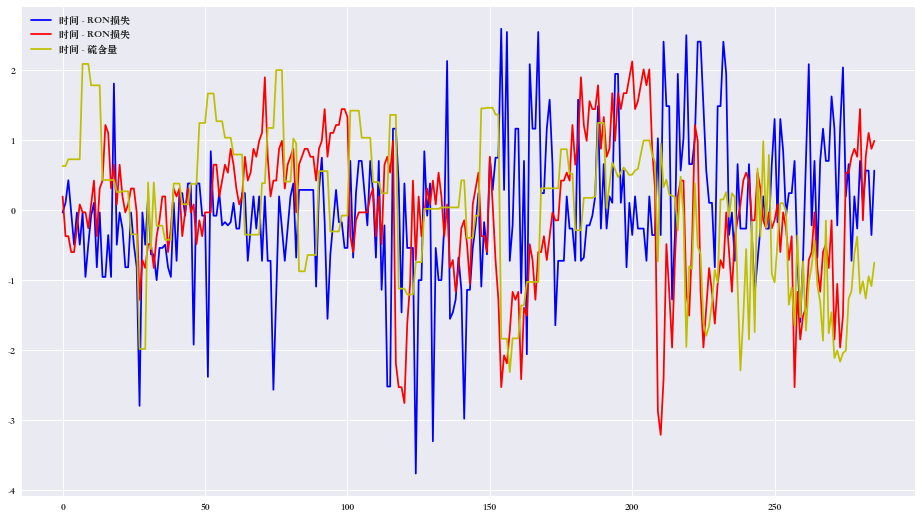

In [16]:
# 查看 产品性质-RON损失 和 时间 && 原料性质-辛烷值RON 和 时间 的分布
plt.figure(figsize = (16, 9))
plt.plot([x for x in range(0 ,samples_data.shape[0])], samples_data[('产品性质', 'RON损失\n（不是变量）')], 'b', label="时间 - RON损失")
plt.plot([x for x in range(0 ,samples_data.shape[0])], samples_data[('原料性质', '辛烷值RON')], 'r', label="时间 - RON损失")
plt.plot([x for x in range(0 ,samples_data.shape[0])], samples_data[('原料性质', '硫含量,μg/g')], 'y', label="时间 - 硫含量")
plt.legend(loc = "upper left")
plt.show()

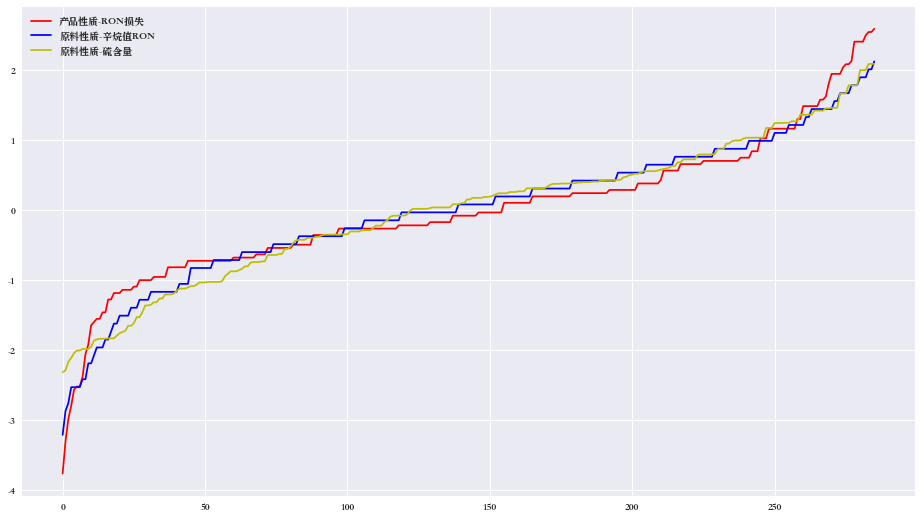

In [17]:
# 查看 产品性质-RON损失 和 原料性质-辛烷值RON 按值大小排序的分布
plt.figure(figsize = (16, 9))
plt.plot([x for x in range(0, samples_data.shape[0])], samples_data[('产品性质', 'RON损失\n（不是变量）')].sort_values(), 'r', label="产品性质-RON损失")
plt.plot([x for x in range(0, samples_data.shape[0])], samples_data[('原料性质', '辛烷值RON')].sort_values(), 'b', label="原料性质-辛烷值RON")
plt.plot([x for x in range(0, samples_data.shape[0])], samples_data[('原料性质', '硫含量,μg/g')].sort_values(), 'y', label="原料性质-硫含量")
plt.legend(loc = "upper left")
plt.show()

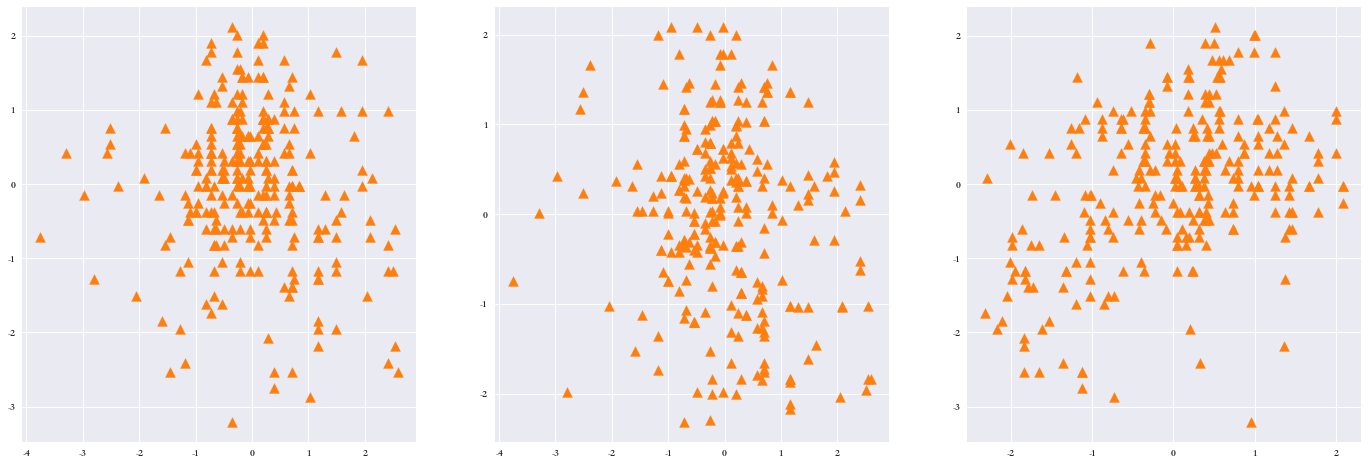

In [18]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(131)
plt.scatter(samples_data[('产品性质', 'RON损失\n（不是变量）')], samples_data[('原料性质', '辛烷值RON')], c="#ff7f0e", marker="^", s=100)
plt.subplot(132)
plt.scatter(samples_data[('产品性质', 'RON损失\n（不是变量）')], samples_data[('原料性质', '硫含量,μg/g')], c="#ff7f0e", marker="^", s=100)
plt.subplot(133)
plt.scatter(samples_data[('原料性质', '硫含量,μg/g')], samples_data[('原料性质', '辛烷值RON')], c="#ff7f0e", marker="^", s=100)
plt.show()

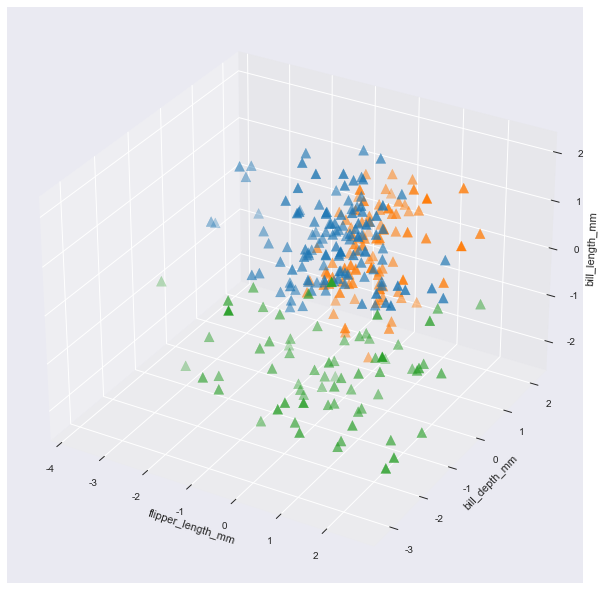

In [19]:
# training gaussian mixture model
gmm = GaussianMixture(n_components=3)
gmm.fit(samples_data[[('产品性质', 'RON损失\n（不是变量）'), ('原料性质', '辛烷值RON'), ('原料性质', '硫含量,μg/g')]])

# predictions from gmm
labels = gmm.predict(samples_data[[('产品性质', 'RON损失\n（不是变量）'), ('原料性质', '辛烷值RON'), ('原料性质', '硫含量,μg/g')]])
frame = pd.DataFrame(samples_data[[('产品性质', 'RON损失\n（不是变量）'), ('原料性质', '辛烷值RON'), ('原料性质', '硫含量,μg/g')]])
frame['cluster'] = labels
frame.columns = [('产品性质', 'RON损失\n（不是变量）'), ('原料性质', '辛烷值RON'), ('原料性质', '硫含量,μg/g'), 'cluster']

plt.style.use('seaborn')
fig = plt.figure(figsize=(16, 8))
ax = Axes3D(fig)

color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for k in range(0, 8):
    data = frame[frame["cluster"] == k]
    ax.scatter(data[('产品性质', 'RON损失\n（不是变量）')], data[('原料性质', '辛烷值RON')], data[('原料性质', '硫含量,μg/g')], c=color[k], marker="^", s=100)
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('bill_depth_mm')
ax.set_zlabel('bill_length_mm')
plt.show()

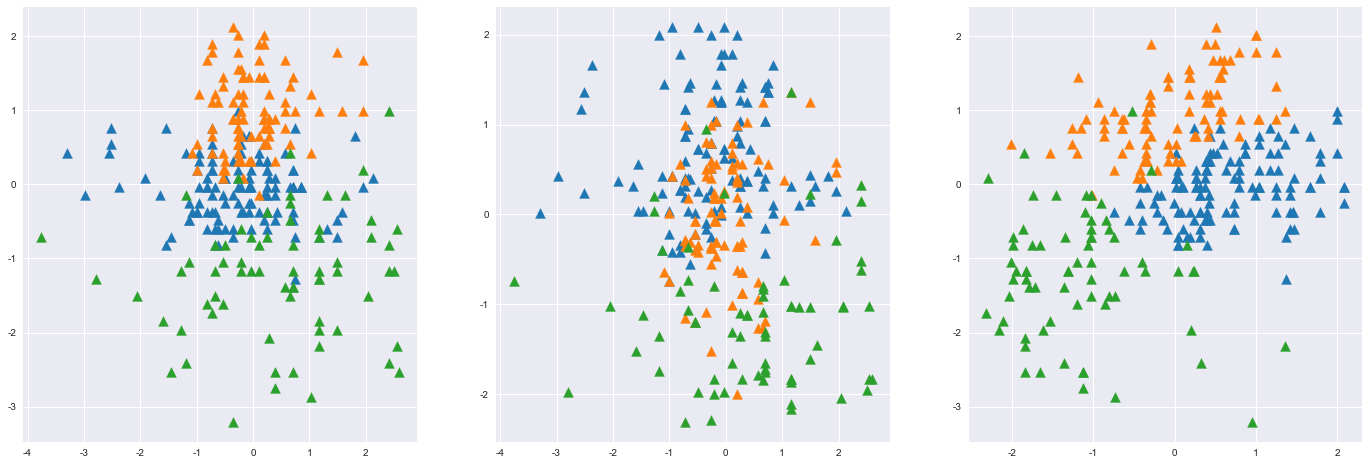

In [20]:
fig = plt.figure(figsize=(24, 8))
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.subplot(131)
for k in range(0, 8):
    data = frame[frame["cluster"] == k]
    plt.scatter(data[('产品性质', 'RON损失\n（不是变量）')], data[('原料性质', '辛烷值RON')], c=color[k], marker="^", s=100)
plt.subplot(132)
for k in range(0, 8):
    data = frame[frame["cluster"] == k]
    plt.scatter(data[('产品性质', 'RON损失\n（不是变量）')], data[('原料性质', '硫含量,μg/g')], c=color[k], marker="^", s=100)
plt.subplot(133)
for k in range(0, 8):
    data = frame[frame["cluster"] == k]
    plt.scatter(data[('原料性质', '硫含量,μg/g')], data[('原料性质', '辛烷值RON')], c=color[k], marker="^", s=100)
plt.show()

In [21]:
samples_data['cluster'] = labels + 1
samples_data.head(n=5)

样本编号                   时间      原料性质            \
    Unnamed: 0_level_1   Unnamed: 1_level_1  硫含量,μg/g    辛烷值RON   
324                325  1492416000000000000  0.631387  0.196377   
323                324  1492588800000000000  0.631387 -0.370934   
322                323  1492761600000000000  0.727392 -0.370934   
321                322  1493020800000000000  0.727392 -0.597858   
320                321  1493193600000000000  0.727392 -0.597858   

                                                                   产品性质  ...  \
    饱和烃,v%（烷烃+环烷烃）  烯烃,v%  芳烃,v% 溴值\n,gBr/100g 密度(20℃),\nkg/m³ 硫含量,μg/g  ...   
324          46.72  33.78  19.50         45.45           730.0     11.8  ...   
323          46.72  33.78  19.50         45.45           730.0      3.6  ...   
322          47.19  31.30  21.51         52.02           725.2      3.2  ...   
321          47.19  31.30  21.51         52.02           725.2      3.2  ...   
320          47.19  31.30  21.51         52.02           725.2      3.2  ...   

    S-ZORB.FT_1006.DACA.PV S-ZORB.FT_5204.DACA.PV  \
             加氢裂化轻石脑油进装置流量              汽油产品去气分流量   
324             8379.94380             158.409230   
323             7998.80235             149.533987   
322             8246.20925             150.095445   
321             8457.86080             148.748365   
320             8328.97475             150.441617   

    S-ZORB.FT_1006.TOTALIZERA.PV S-ZORB.FT_5204.TOTALIZERA.PV  \
                 加氢裂化轻石脑油进装置累积流量                  汽油产品去气分累积流量   
324                  82306629.25                  2103369.350   
323                  82696129.75                  2110959.450   
322                  83087625.75                  2118469.700   
321                  83687113.25                  2129270.425   
320                  84087479.25                  2136687.475   

    S-ZORB.FT_1503.DACA.PV S-ZORB.FT_1503.TOTALIZERA.PV  \
         8.0MPa氢气至循环氢压缩机入口            8.0MPa氢气至循环氢压缩机入口   
324            5419704.000                   1352423.75   
323            4917537.750                   1400663.75   
322            4415371.475                   1448903.75   
321            3662122.000                   1521263.75   
320            3159955.750                   1569503.75   

    S-ZORB.FT_1504.DACA.PV S-ZORB.FT_1504.TOTALIZERA.PV S-ZORB.PC_1001A.PV  \
         8.0MPa氢气至反吹氢压缩机出口            8.0MPa氢气至反吹氢压缩机出口        D101原料缓冲罐压力   
324           -13900.46050                     445996.8        -120.560472   
323           -12373.27275                     569836.8        -120.047287   
322           -10846.08550                     693676.8        -119.534108   
321            -8555.30420                     879436.8        -118.764337   
320            -7028.11670                    1003276.5        -118.251152   

    cluster  
             
324       1  
323       1  
322       1  
321       1  
320       1  

[5 rows x 371 columns]

In [22]:
# 查询 样本数据 的 零值占比
samples_nonzeroratio = samples_data.astype(bool).sum(axis=0) / samples_data.shape[0]
samples_dummy_columns = []
for (code_name, i18n_name) in samples_nonzeroratio.keys():
    if samples_nonzeroratio[(code_name, i18n_name)] != 1.0:
        print(f"Missing Value Ratio: {code_name}[{i18n_name}]:  => {samples_nonzeroratio[(code_name, i18n_name)]}")
        samples_dummy_columns.append((code_name, i18n_name))

Missing Value Ratio: S-ZORB.FC_2301.PV[D105流化氢气流量]:  => 0.5594405594405595
Missing Value Ratio: S-ZORB.FT_9301.PV[蒸汽进装置流量]:  => 0.986013986013986
Missing Value Ratio: S-ZORB.FT_1501.PV[新氢进装置流量]:  => 0.12937062937062938
Missing Value Ratio: S-ZORB.FT_5104.PV[轻烃出装置流量]:  => 0.5979020979020979
Missing Value Ratio: S-ZORB.FT_9101.PV[污油出装置]:  => 0.5769230769230769
Missing Value Ratio: S-ZORB.FT_9402.PV[非净化风进装置流量]:  => 0.9965034965034965
Missing Value Ratio: S-ZORB.FT_1002.PV[1#催化汽油进装置流量]:  => 0.5769230769230769
Missing Value Ratio: S-ZORB.FT_1003.PV[2#催化汽油进装置流量]:  => 0.9895104895104895
Missing Value Ratio: S-ZORB.FT_1004.PV[3#催化汽油进装置流量]:  => 0.9615384615384616
Missing Value Ratio: S-ZORB.FC_1202.PV[D121顶去放火炬流量]:  => 0.34265734265734266
Missing Value Ratio: S-ZORB.FC_3103.PV[再生冷氮气流量]:  => 0.32517482517482516
Missing Value Ratio: S-ZORB.FT_1002.TOTAL[0]:  => 0.42657342657342656
Missing Value Ratio: S-ZORB.FT_1501.TOTAL[新氢进装置流量]:  => 0.6223776223776224
Missing Value Ratio: S-ZORB.FT_5102.PV[0]:

检查下面的变量取值范围是否包含0

+ ('S-ZORB.FC_2301.PV', 'D105流化氢气流量')                    0-350
+ ('S-ZORB.FT_1501.PV', '新氢进装置流量')                      0-3500
+ ('S-ZORB.FT_5104.PV', '轻烃出装置流量')                     0-3500
+ ('S-ZORB.FT_9101.PV', '污油出装置')                         0-85
+ ('S-ZORB.FT_1002.PV', '1#催化汽油进装置流量')               0-140
+ ('S-ZORB.FT_1004.PV', '3#催化汽油进装置流量')                 0-90
+ ('S-ZORB.FC_1202.PV', 'D121顶去放火炬流量')                0-300
+ ('S-ZORB.FC_3103.PV', '再生冷氮气流量')                     0-80
+ ('S-ZORB.FT_1002.TOTAL', 0)                            0-620
+ ('S-ZORB.FT_1501.TOTAL', '新氢进装置流量')                0-55000000
+ ('S-ZORB.FT_5102.PV', 0)                                   0-450
+ ('S-ZORB.FT_2901.DACA', 'D-109松动风流量'),                   0-30
+ ('S-ZORB.FT_2002.DACA', '热循环气去R101底提升气管流量')        0-400
+ ('S-ZORB.FC_1104.DACA', '进料调节阀旁路流量')                  0-1
+ ('S-ZORB.FT_2803.DACA', '紧急氢气去D-102流量')                0-3
+ ('S-ZORB.FT_1502.DACA', '补充氢压缩机出口返回管流量')          0-2500
+ ('S-ZORB.FT_3702.DACA', '闭锁料斗H2过滤器出口气流量')           0-60
+ ('S-ZORB.TEX_3103A.DACA', 'EH-102加热元件/A束温度')           0-100
+ ('S-ZORB.FT_5102.DACA.PV', 'D-201含硫污水排量')              0-420
+ ('S-ZORB.FT_1006.DACA.PV', '加氢裂化轻石脑油进装置流量')       0-12000
+ ('S-ZORB.FT_5204.DACA.PV', '汽油产品去气分流量')               0-2500

即存在零值的属性其值域都包含了零，但是考虑到上述属性值值域范围在边界的情况下才为0，因此不考虑其取零值的情况，只作为缺失的情况进行考虑

<AxesSubplot:>

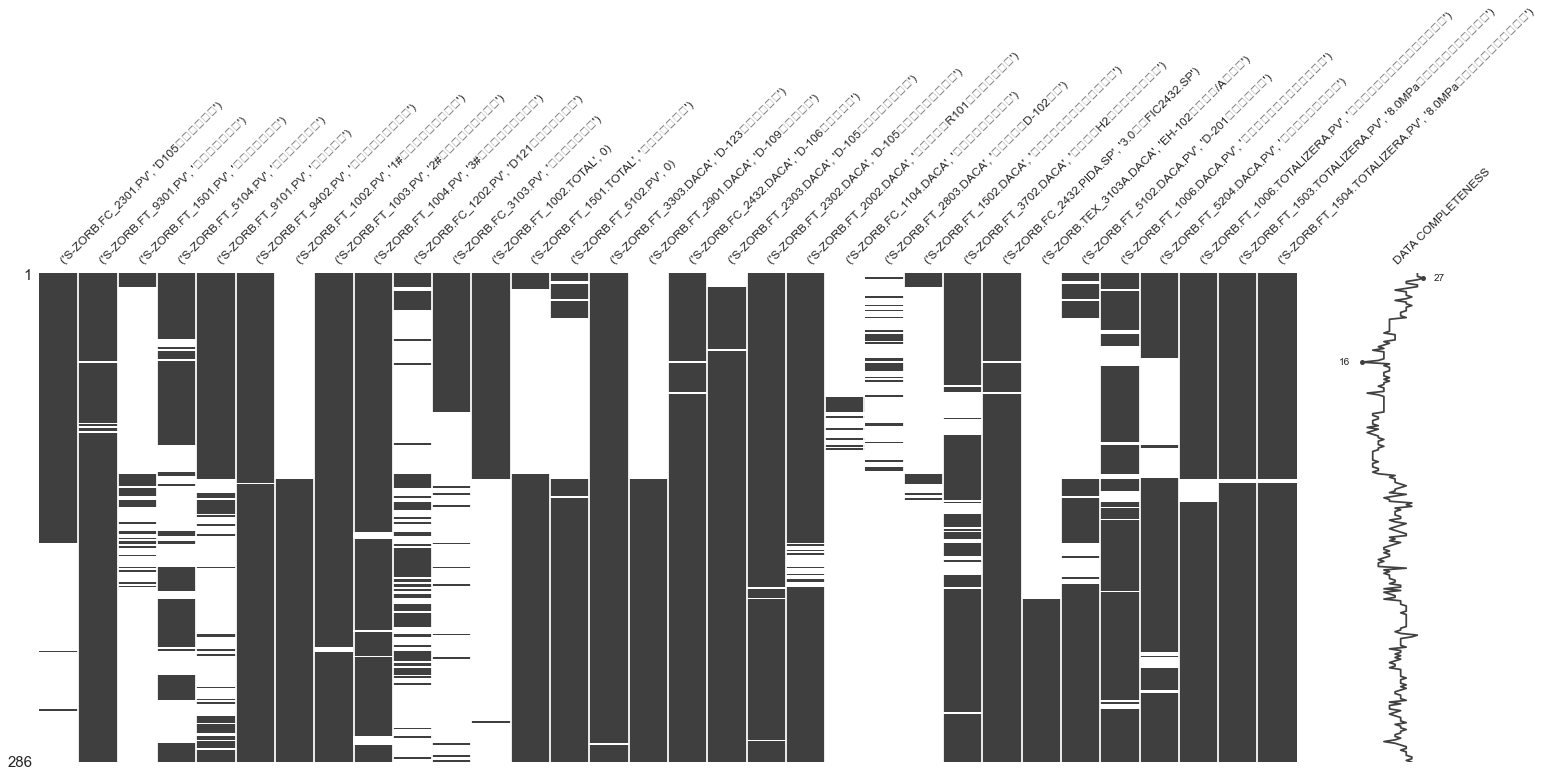

In [23]:
# 可视化呈现 样本数据 中属性中属性值存在零值的属性的分布
msno.matrix(samples_data[samples_dummy_columns].replace(0, np.nan), figsize=(25, 9), fontsize=12, labels=True)

In [24]:
# 缺失值比例
missing_ratio2 = 0.95  # 可调参数

In [25]:
# 对 缺失值较多属性值 的属性进行丢弃 对 缺失值较少属性值 的属性进行插值
samples_delete_columns = []
samples_insert_columns = []
for (code_name, i18n_name) in samples_nonzeroratio.keys():
    if samples_nonzeroratio[(code_name, i18n_name)] < missing_ratio2:
        # print(f"code_name: {code_name} => nonzero_ratio: {samples_nonzeroratio[(code_name, i18n_name)]}")
        samples_delete_columns.append((code_name, i18n_name))
    elif missing_ratio2 <= samples_nonzeroratio[(code_name, i18n_name)] < 1:
        samples_insert_columns.append((code_name, i18n_name))
samples_data = samples_data.drop(columns=samples_delete_columns, axis=1)
print(f"可以直接进行删除的特征：{samples_delete_columns}")
print(f"{'='*40}")
print(f"需要进行数值填充的特征：{samples_insert_columns}")

可以直接进行删除的特征：[('S-ZORB.FC_2301.PV', 'D105流化氢气流量'), ('S-ZORB.FT_1501.PV', '新氢进装置流量'), ('S-ZORB.FT_5104.PV', '轻烃出装置流量'), ('S-ZORB.FT_9101.PV', '污油出装置'), ('S-ZORB.FT_1002.PV', '1#催化汽油进装置流量'), ('S-ZORB.FC_1202.PV', 'D121顶去放火炬流量'), ('S-ZORB.FC_3103.PV', '再生冷氮气流量'), ('S-ZORB.FT_1002.TOTAL', 0), ('S-ZORB.FT_1501.TOTAL', '新氢进装置流量'), ('S-ZORB.FT_5102.PV', 0), ('S-ZORB.FT_2901.DACA', 'D-109松动风流量'), ('S-ZORB.FT_2002.DACA', '热循环气去R101底提升气管流量'), ('S-ZORB.FC_1104.DACA', '进料调节阀旁路流量'), ('S-ZORB.FT_2803.DACA', '紧急氢气去D-102流量'), ('S-ZORB.FT_1502.DACA', '补充氢压缩机出口返回管流量'), ('S-ZORB.FT_3702.DACA', '闭锁料斗H2过滤器出口气流量'), ('S-ZORB.TEX_3103A.DACA', 'EH-102加热元件/A束温度'), ('S-ZORB.FT_5102.DACA.PV', 'D-201含硫污水排量'), ('S-ZORB.FT_1006.DACA.PV', '加氢裂化轻石脑油进装置流量'), ('S-ZORB.FT_5204.DACA.PV', '汽油产品去气分流量')]
需要进行数值填充的特征：[('S-ZORB.FT_9301.PV', '蒸汽进装置流量'), ('S-ZORB.FT_9402.PV', '非净化风进装置流量'), ('S-ZORB.FT_1003.PV', '2#催化汽油进装置流量'), ('S-ZORB.FT_1004.PV', '3#催化汽油进装置流量'), ('S-ZORB.FT_3303.DACA', 'D-123蒸汽出口流量'), ('S-ZORB.FC_2432.DACA', 'D

<AxesSubplot:>

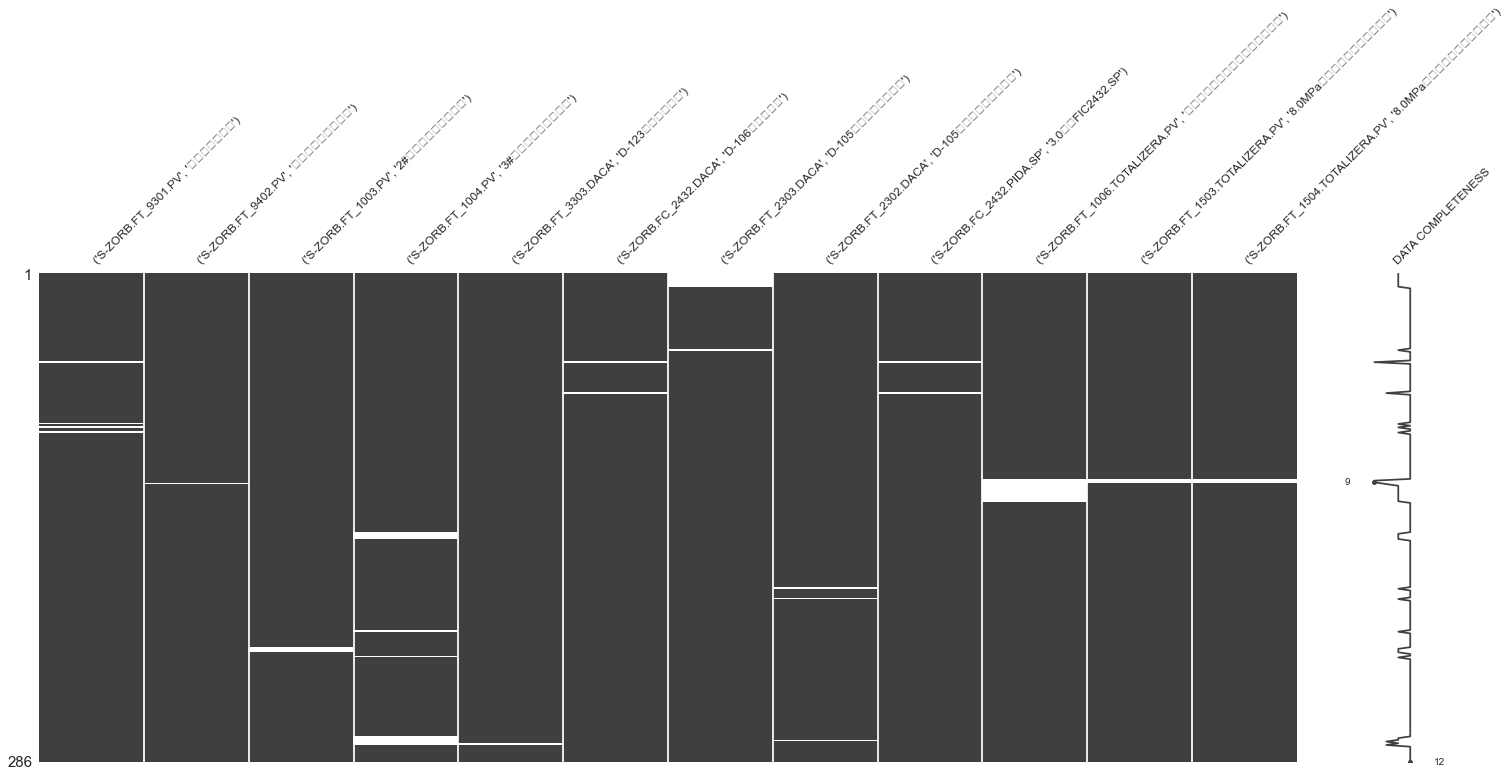

In [26]:
# 可视化呈现 样本数据 中属性中属性值需要进行填充的情况
msno.matrix(samples_data[samples_insert_columns].replace(0, np.nan), figsize=(25, 9), fontsize=12, labels=True)

In [27]:
# 使用 线性插值的方式 对缺失的属性值进行插值操作
samples_data = samples_data.replace(0, np.NaN).interpolate("linear")

<AxesSubplot:>

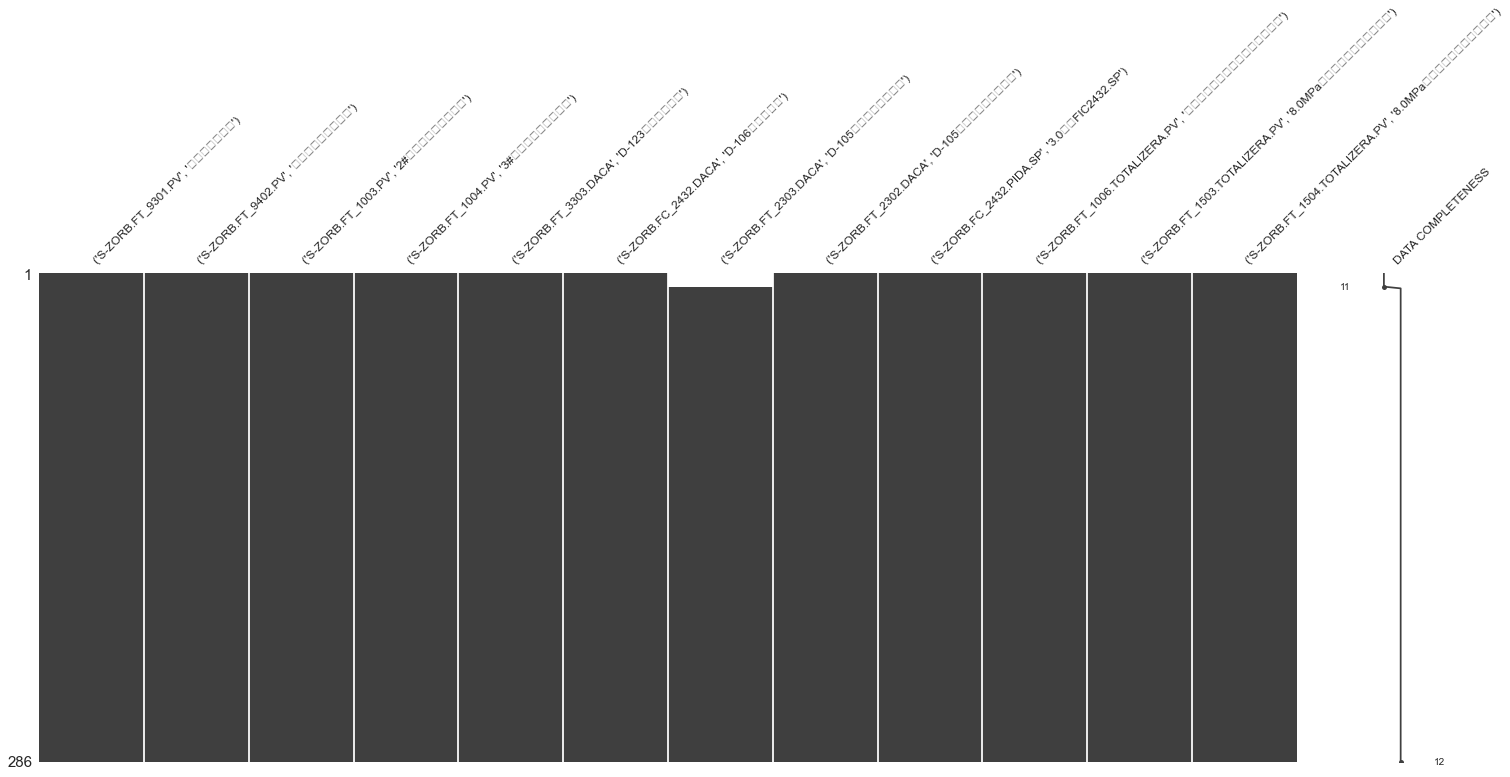

In [28]:
# 可视化呈现 样本数据 中属性中属性值插值的情况
msno.matrix(samples_data[samples_insert_columns], figsize=(25, 9), fontsize=12, labels=True)

In [29]:
print(samples_data[samples_data['cluster'] == 1].shape[0])
print(samples_data[samples_data['cluster'] == 2].shape[0])
print(samples_data[samples_data['cluster'] == 3].shape[0])

124
93
69


In [30]:
# 相关系数 $cc_{1}$
threshold = 0.4  # 可调参数

In [31]:
%store threshold
%store samples_data
cluster_1st = samples_data[samples_data['cluster'] == 1]
%store cluster_1st
cluster_2nd = samples_data[samples_data['cluster'] == 2]
%store cluster_2nd
cluster_3rd = samples_data[samples_data['cluster'] == 3]
%store cluster_3rd

Stored 'threshold' (float)
Stored 'samples_data' (DataFrame)
Stored 'cluster_1st' (DataFrame)
Stored 'cluster_2nd' (DataFrame)
Stored 'cluster_3rd' (DataFrame)
